In [20]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# STEP 1: Load Dataset
import pandas as pd

# Load dataset
file_path = "/content/drive/MyDrive/Dataset/MaterialStrength.csv"  # Sesuaikan path jika diperlukan
data = pd.read_csv(file_path)

# Tampilkan informasi dataset
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [22]:
# STEP 2: Explorasi Data
print("Dataset Info:")
print(data.info())

print("\nDeskripsi Statistik:")
print(data.describe())

# Memeriksa missing values
print("\nJumlah Missing Values per Kolom:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB
None

In [23]:
# STEP 3: Pra-pemrosesan Data
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan label (y)
X = data.drop('target_feature', axis=1)  # Ganti 'target_feature' dengan nama kolom label pada dataset
y = data['target_feature']

# Konversi kolom kategorikal menjadi numerik (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")
# Konversi target menjadi kategori (binarisasi, misalnya > median = 1, lainnya = 0)
y = (y > y.median()).astype(int)  # Mengubah target menjadi 0 dan 1 berdasarkan median


Training Data: (824, 27), Testing Data: (206, 27)


In [24]:
# Menggunakan SVR untuk regresi
from sklearn.svm import SVR

# Inisialisasi model SVR
model = SVR(kernel='linear')

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi menggunakan metrik regresi (misalnya Mean Squared Error, R^2)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 94.38
R^2 Score: 0.63


=== Evaluasi Regresi ===
Mean Squared Error: 94.38
R^2 Score: 0.63

=== Evaluasi Klasifikasi ===
Accuracy: 0.89
Precision: 0.88
Recall: 0.89
F1 Score: 0.89


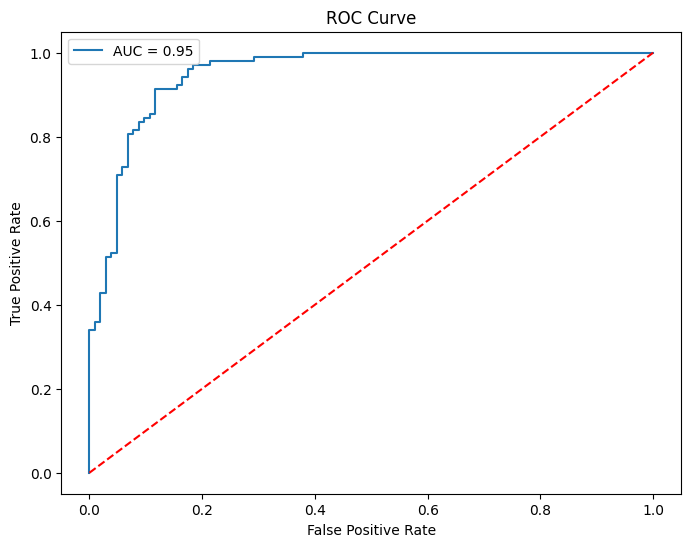

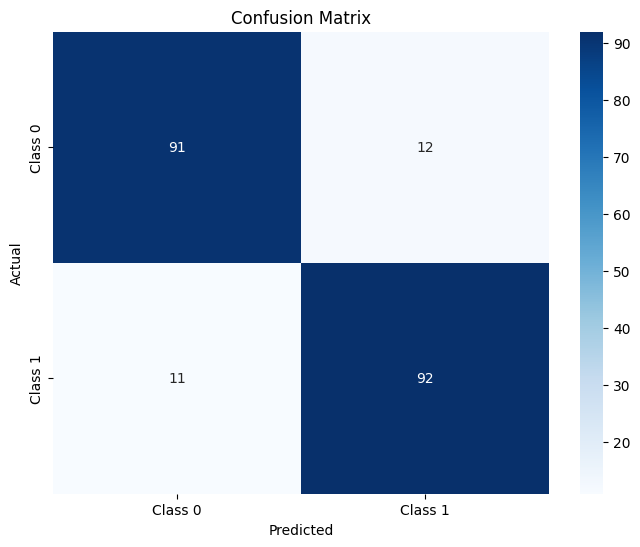

In [28]:
# Menggunakan SVR untuk regresi
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model SVR
model = SVR(kernel='linear')

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# 1. Evaluasi untuk regresi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"=== Evaluasi Regresi ===")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 2. Konversi ke klasifikasi (threshold median)
threshold = y_test.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Evaluasi untuk klasifikasi
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"\n=== Evaluasi Klasifikasi ===")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 3. ROC Curve dan AUC
y_proba = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())  # Normalisasi ke [0, 1]
auc = roc_auc_score(y_test_class, y_proba)

fpr, tpr, thresholds = roc_curve(y_test_class, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Garis diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 4. Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
